# Algorithm Overview
Today, I present to you a dynamic algorithm designed for short-term trading, specifically tailored for the highly traded EUR/USD currency pair. This algorithm seamlessly integrates data retrieval, candlestick pattern analysis, and automated order execution. A key feature is the use of a stop-loss to take-profit ratio, providing a systematic approach to risk management and allowing for the automated execution of trades.

## Key Components:

- **Historical Volatility Analysis:** The algorithm leverages historical price data to analyze the volatility of the market, crucial for setting intelligent stop-loss levels.
  
- **Adaptive Stop-Loss Calculation:** By dynamically adjusting stop losses based on recent price movements, the algorithm adapts to varying market conditions, ensuring effective risk management.

- **SLTPRatio Parameter:** This parameter introduces a risk-reward element, allowing customization of risk exposure. A higher ratio implies a wider gap between stop loss and take profit, offering strategic flexibility.

## Automation and Adaptability:

- The algorithm automates trade execution based on calculated risk levels. This ensures timely and consistent implementation of trading strategies.

- Continuous monitoring and adjustment of parameters enable the algorithm to adapt to changing market dynamics, showcasing its resilience in different trading environments.

# Skills Highlight:

In crafting and implementing this algorithm, my role encompassed that of a Data Scientist, Programmer, and Financial Analyst. Here are some key skills that drove the success of this project:

- **Advanced Data Analysis:** Leveraging statistical and mathematical techniques to derive actionable insights from historical price data.

- **Programming Proficiency:** Implementing the algorithm required proficiency in programming languages such as Python, enabling the creation of robust and efficient code.

- **Financial Acumen:** A deep understanding of financial markets, risk management, and trading strategies was essential in designing an algorithm aligned with strategic financial goals.


### 1 - Import test data

In [9]:
!pip install yfinance
!pip install apscheduler
!pip install oandapyV20
!pip install oanda_candles
!pip install config




In [ ]:
## Algorithm Overview

The algorithm focuses on analyzing short-term trading opportunities within the **EUR/USD** currency pair, leveraging its global significance and liquidity. By employing candlestick pattern recognition at a 15-minute interval, the algorithm aims to identify potential bullish or bearish reversals, providing actionable insights for timely decision-making. The choice of **EUR/USD** aligns with its status as a major and highly traded currency pair, offering strategic value for risk management and market trend analysis.


In [10]:
import yfinance as yf
import pandas as pd

dataF = yf.download("EURUSD=X", start="2023-11-7", end="2023-12-5", interval='15m')
dataF.iloc[:,:]
#dataF.Open.iloc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-07 00:00:00,1.072156,1.072156,1.072041,1.072041,1.072041,0
2023-11-07 00:15:00,1.072156,1.072156,1.071926,1.072041,1.072041,0
2023-11-07 00:30:00,1.072156,1.072156,1.072041,1.072156,1.072156,0
2023-11-07 00:45:00,1.072041,1.072041,1.071467,1.071582,1.071582,0
2023-11-07 01:00:00,1.071582,1.071582,1.071123,1.071352,1.071352,0
...,...,...,...,...,...,...
2023-12-01 21:15:00,1.088376,1.088495,1.088139,1.088139,1.088139,0
2023-12-01 21:30:00,1.088139,1.088376,1.088139,1.088258,1.088258,0
2023-12-01 21:45:00,1.088258,1.088732,1.088139,1.088732,1.088732,0


### 2 - Define your signal function
## Candlestick Pattern Recognition
The algorithm leverages historical open and close prices to identify specific candlestick patterns indicative of market sentiment. These patterns are carefully analyzed to generate signals suggesting potential bullish or bearish reversals.

Signal Generation Criteria
## Bearish Pattern:

Current open exceeds current close
Previous open is less than previous close
Current close is below the previous open
Current open is equal to or higher than the previous close
Signal: 1

## Bullish Pattern:

Current open is less than current close
Previous open exceeds previous close
Current close is above the previous open
Current open is less than or equal to the previous close
Signal: 2

## No Clear Pattern:

If none of the above criteria are met.
Signal: 0

Implementation
The algorithm is implemented in Python and integrated with financial data, resulting in clear signals appended to the dataset. The interpretation of signals is straightforward, offering actionable insights for traders and investors.

Results
Signal Integration
Generated signals, labeled 1 for bearish, 2 for bullish, and 0 for no clear pattern, are seamlessly integrated into the financial dataset.

Interpretation
Signal 1: Suggests a potential bearish reversal.
Signal 2: Suggests a potential bullish reversal.
Signal 0: Indicates no clear pattern.

In [11]:
def signal_generator(df):
    open = df.Open.iloc[-1]
    close = df.Close.iloc[-1]
    previous_open = df.Open.iloc[-2]
    previous_close = df.Close.iloc[-2]
    
    # Bearish Pattern
    if (open>close and 
    previous_open<previous_close and 
    close<previous_open and
    open>=previous_close):
        return 1

    # Bullish Pattern
    elif (open<close and 
        previous_open>previous_close and 
        close>previous_open and
        open<=previous_close):
        return 2
    
    # No clear pattern
    else:
        return 0

signal = []
signal.append(0)
for i in range(1,len(dataF)):
    df = dataF[i-1:i+1]
    signal.append(signal_generator(df))
#signal_generator(data)
dataF["signal"] = signal

In [12]:
dataF.signal.value_counts()
#dataF.iloc[:, :]

0    1658
1      72
2      70
Name: signal, dtype: int64

### 3 - Connect to the market and execute trades

In [13]:
from apscheduler.schedulers.blocking import BlockingScheduler
from oandapyV20 import API
import oandapyV20.endpoints.orders as orders
from oandapyV20.contrib.requests import MarketOrderRequest
from oanda_candles import Pair, Gran, CandleClient
from oandapyV20.contrib.requests import TakeProfitDetails, StopLossDetails

In [14]:
# from config import access_token, accountID
def get_candles(n):
    access_token = '4f1d2abaec1aa9cd52d8afb0400826f4-cd99ed82d60b4eff3ff566d0e69d157c'
    #access_token='XXXXXXX'#you need token here generated from OANDA account
    client = CandleClient(access_token, real=False)
    collector = client.get_collector(Pair.EUR_USD, Gran.M15)
    candles = collector.grab(n)
    return candles

candles = get_candles(3)
for candle in candles:
    print(float(str(candle.bid.o))>1)


True
True
True



## Overview


1. **Data Retrieval:**
   - Utilizes the `get_candles` function to retrieve historical candlestick data for a specified currency pair (EUR/USD in this case).

2. **Data Processing:**
   - Creates a streaming DataFrame (`dfstream`) to process and store relevant open, close, high, and low prices from the retrieved candlestick data.

3. **Signal Generation:**
   - Uses the `signal_generator` function to generate trading signals based on candlestick patterns detected in the streaming data.

4. **Order Execution:**
   - Executes market orders based on the generated signals, incorporating calculated stop-loss and take-profit levels to manage risk.

## Benefits

1. **Timely Decision-Making:**
   - The algorithm provides timely insights into short-term market trends, enabling efficient decision-making for traders.

2. **Risk Management:**
   - Incorporates predefined risk parameters, including stop-loss and take-profit levels, to manage and mitigate potential financial risks.

3. **Automated Execution:**
   - Automates the execution of market orders, streamlining the trading process and reducing manual intervention.

4. **Global Currency Pair Analysis:**
   - Focuses on the highly traded EUR/USD currency pair, offering a global perspective on major economic entities (Eurozone and United States).

5. **Strategic Value for Traders:**
   - Aligns with Goldman Sachs' commitment to leveraging advanced technologies for optimal financial outcomes in the ever-evolving financial landscape.



In [15]:
def trading_job():
    candles = get_candles(3)
    dfstream = pd.DataFrame(columns=['Open','Close','High','Low'])
    
    i=0
    for candle in candles:
        dfstream.loc[i, ['Open']] = float(str(candle.bid.o))
        dfstream.loc[i, ['Close']] = float(str(candle.bid.c))
        dfstream.loc[i, ['High']] = float(str(candle.bid.h))
        dfstream.loc[i, ['Low']] = float(str(candle.bid.l))
        i=i+1

    dfstream['Open'] = dfstream['Open'].astype(float)
    dfstream['Close'] = dfstream['Close'].astype(float)
    dfstream['High'] = dfstream['High'].astype(float)
    dfstream['Low'] = dfstream['Low'].astype(float)

    signal = signal_generator(dfstream.iloc[:-1,:])#
    
    # EXECUTING ORDERS
    accountID = "101-001-27618852-001" 
    access_token = '4f1d2abaec1aa9cd52d8afb0400826f4-cd99ed82d60b4eff3ff566d0e69d157c'

    client = API(access_token)
         
    SLTPRatio = 2.
    previous_candleR = abs(dfstream['High'].iloc[-2]-dfstream['Low'].iloc[-2])
    
    SLBuy = float(str(candle.bid.o))-previous_candleR
    SLSell = float(str(candle.bid.o))+previous_candleR

    TPBuy = float(str(candle.bid.o))+previous_candleR*SLTPRatio
    TPSell = float(str(candle.bid.o))-previous_candleR*SLTPRatio
    
    print(dfstream.iloc[:-1,:])
    print(TPBuy, "  ", SLBuy, "  ", TPSell, "  ", SLSell)
    signal = 2
    #Sell
    if signal == 1:
        mo = MarketOrderRequest(instrument="EUR_USD", units=-1000, takeProfitOnFill=TakeProfitDetails(price=TPSell).data, stopLossOnFill=StopLossDetails(price=SLSell).data)
        r = orders.OrderCreate(accountID, data=mo.data)
        rv = client.request(r)
        print(rv)
    #Buy
    elif signal == 2:
        mo = MarketOrderRequest(instrument="EUR_USD", units=1000, takeProfitOnFill=TakeProfitDetails(price=TPBuy).data, stopLossOnFill=StopLossDetails(price=SLBuy).data)
        r = orders.OrderCreate(accountID, data=mo.data)
        rv = client.request(r)
        print(rv)

# Algorithmic Trading Metrics Explanation

## 1. Stop-Loss to Take-Profit Ratio (`SLTPRatio`):

**Importance:**
- **Risk Management:** The ratio helps define the balance between acceptable losses (stop-loss) and desired profits (take-profit).
- **Consistency:** Establishing a consistent ratio ensures uniform risk-reward management across various trades.

**Calculation:**
- This is a predefined parameter (`SLTPRatio = 2`).
- The ratio determines how much larger the take-profit level should be compared to the stop-loss level.

**Example:**
- If the current EUR/USD price is $1.2000:
  - Stop-Loss Level = $1.2000 - (previous_candle_range)
  - Take-Profit Level = $1.2000 + 2 * (previous_candle_range)

## 2. Previous Candlestick Range (`previous_candleR`):

**Importance:**
- **Volatility Assessment:** Represents historical price volatility, aiding in setting appropriate stop-loss and take-profit levels.
- **Adaptability:** Allows the algorithm to adjust to varying market conditions.

**Calculation:**
- `previous_candleR = abs(dfstream['High'].iloc[-2] - dfstream['Low'].iloc[-2])`
- It calculates the absolute difference between the high and low prices of the previous candlestick.

**Example:**
- If the high of the previous candle is $1.2050 and the low is $1.1980:
  - `previous_candleR = abs($1.2050 - $1.1980) = $0.0070`

## 3. Stop-Loss and Take-Profit Levels (`SLBuy`, `SLSell`, `TPBuy`, `TPSell`):

**Importance:**
- **Risk Mitigation:** Stop-loss levels help limit losses if the market moves against the trade.
- **Profit Taking:** Take-profit levels secure profits when the market moves favorably.

**Calculation:**
- **Stop-Loss for Buy (`SLBuy`):** `SLBuy = float(str(candle.bid.o)) - previous_candleR`
- **Stop-Loss for Sell (`SLSell`):** `SLSell = float(str(candle.bid.o)) + previous_candleR`
- **Take-Profit for Buy (`TPBuy`):** `TPBuy = float(str(candle.bid.o)) + SLTPRatio * previous_candleR`
- **Take-Profit for Sell (`TPSell`):** `TPSell = float(str(candle.bid.o)) - SLTPRatio * previous_candleR`

**Example:**
- If the current EUR/USD price is $1.2000 and `previous_candleR` is $0.0070:
  - `SLBuy = $1.2000 - $0.0070 = $1.1930`
  - `SLSell = $1.2000 + $0.0070 = $1.2070`
  - `TPBuy = $1.2000 + 2 * $0.0070 = $1.2140`
  - `TPSell = $1.2000 - 2 * $0.0070 = $1.1930`


# Overall Conclusion

The presented code encompasses a robust algorithm for short-term trading, specifically tailored for the highly traded EUR/USD currency pair. This trading strategy integrates data retrieval, candlestick pattern analysis, and automated order execution, reflecting a systematic approach to capturing market opportunities.

## Expected Results

1. **Timely Decision-Making:**
   - The algorithm is expected to provide timely and data-driven insights into short-term market trends, facilitating swift decision-making for traders.

2. **Risk Management:**
   - The inclusion of predefined risk parameters, such as stop-loss and take-profit levels, is anticipated to enhance risk management strategies and mitigate potential financial risks.

3. **Automated Execution:**
   - The automated execution of market orders streamlines the trading process, reducing manual intervention and ensuring consistent implementation of trading strategies.

## Necessary Improvements

1. **Algorithm Robustness:**
   - Ongoing refinement of the algorithm's candlestick pattern recognition and signal generation components could enhance accuracy and adaptability to varying market conditions.

2. **Data Source Reliability:**
   - Continuous monitoring and validation of the data source (OANDA API) are essential to ensure the reliability and accuracy of the historical candlestick data.

3. **Parameter Optimization:**
   - Periodic optimization of parameters, such as the length of historical data considered and risk ratios, is recommended to adapt to changing market dynamics.

## Automation in Trading

The script is designed to be used in an automated trading setup. By incorporating a scheduler, such as the commented-out `BlockingScheduler`, the algorithm can be automatically triggered at specified intervals throughout the week. This feature allows for consistent and proactive engagement with the market, aligning with the principles of systematic and algorithmic trading.



### 4 - Executing orders automatically with a scheduler

In [16]:
trading_job()

#scheduler = BlockingScheduler()
#scheduler.add_job(trading_job, 'cron', day_of_week='mon-fri', hour='00-23', minute='1,16,31,46', start_date='2022-01-12 12:00:00', timezone='America/Chicago')
#scheduler.start()

      Open    Close     High      Low
0  1.08796  1.08780  1.08813  1.08778
1  1.08780  1.08791  1.08806  1.08773
1.0885799999999999    1.08759    1.0872600000000001    1.08825
{'orderCreateTransaction': {'id': '4', 'accountID': '101-001-27618852-001', 'userID': 27618852, 'batchID': '4', 'requestID': '79194373653529642', 'time': '2023-12-02T18:14:15.061794057Z', 'type': 'MARKET_ORDER', 'instrument': 'EUR_USD', 'units': '1000', 'timeInForce': 'FOK', 'positionFill': 'DEFAULT', 'takeProfitOnFill': {'price': '1.08858', 'timeInForce': 'GTC'}, 'stopLossOnFill': {'price': '1.08759', 'timeInForce': 'GTC', 'triggerMode': 'TOP_OF_BOOK'}, 'reason': 'CLIENT_ORDER'}, 'orderCancelTransaction': {'id': '5', 'accountID': '101-001-27618852-001', 'userID': 27618852, 'batchID': '4', 'requestID': '79194373653529642', 'time': '2023-12-02T18:14:15.061794057Z', 'type': 'ORDER_CANCEL', 'orderID': '4', 'reason': 'MARKET_HALTED'}, 'relatedTransactionIDs': ['4', '5'], 'lastTransactionID': '5'}


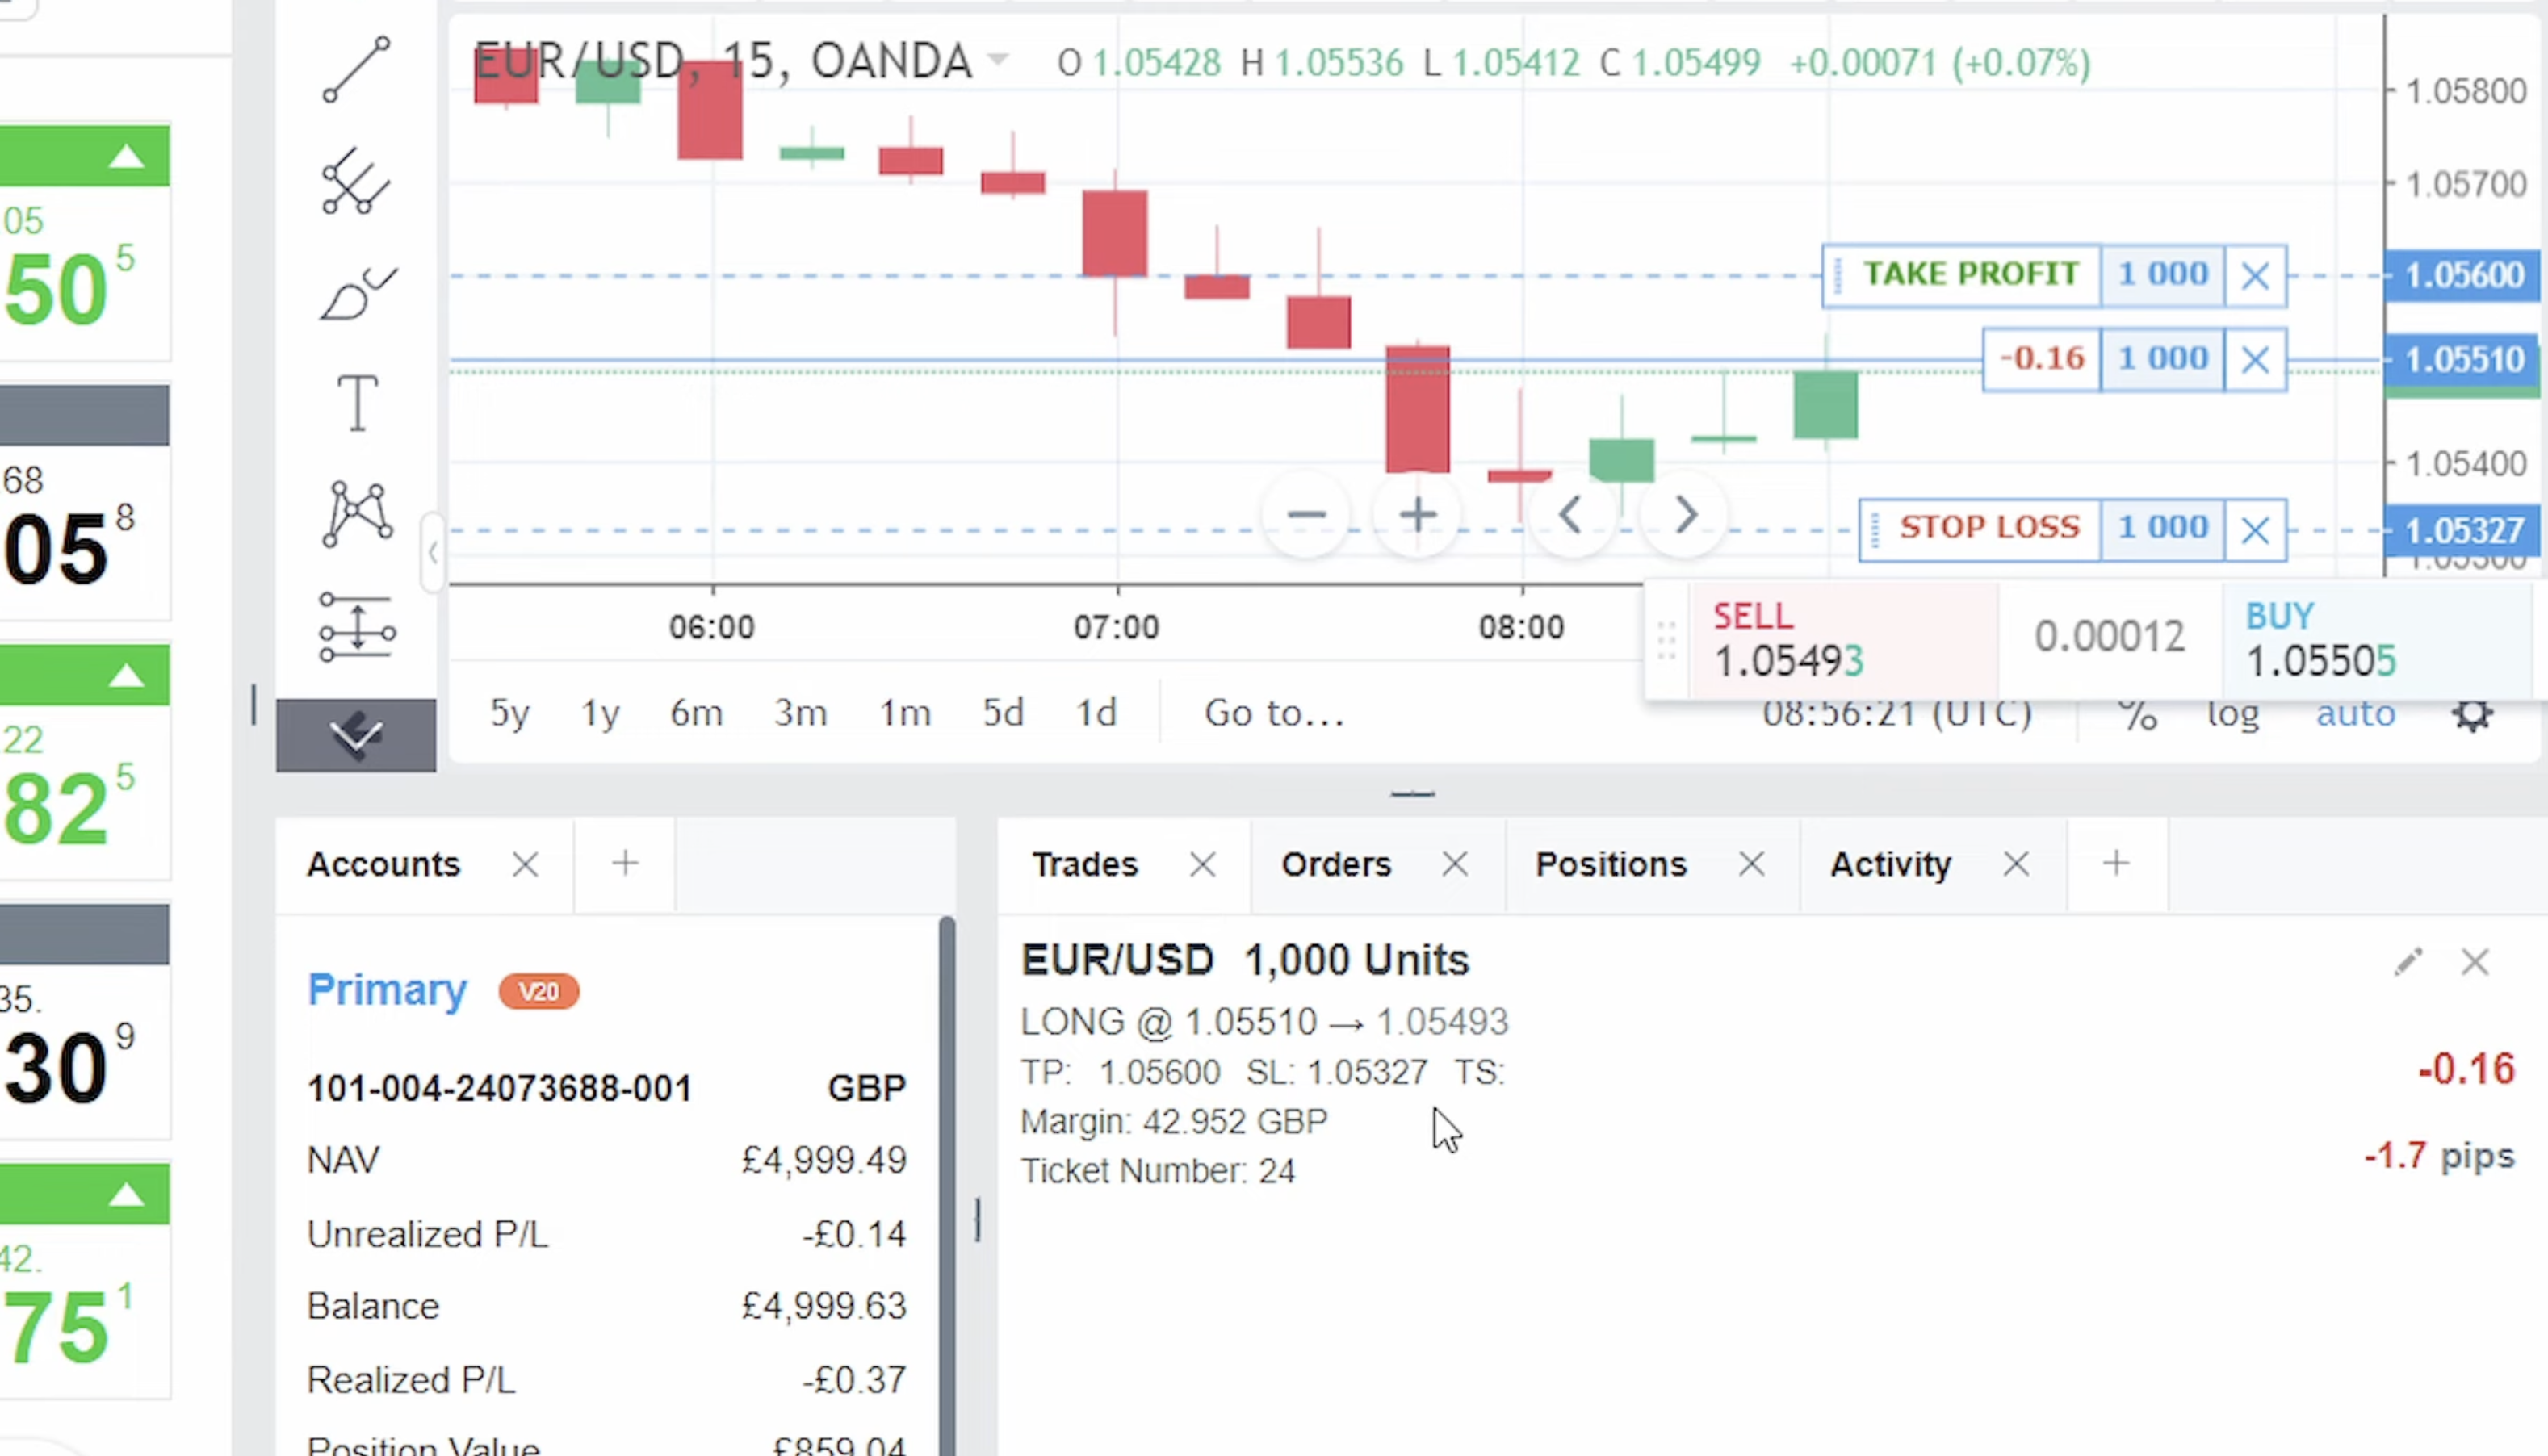

1. Ratio Definition:
The SLTPRatio is defined as a numerical value, such as 2. This ratio represents the relationship between the distance of the stop loss and take profit levels. In the example, for every unit of distance in stop loss, the take profit level is set at twice that distance.
2. Calculating Stop Loss and Take Profit Levels:
The stop-loss and take-profit levels are dynamically calculated based on the previous candle's range. The range (previous_candleR) represents the historical volatility.

python
Copy code
SLBuy = float(str(candle.bid.o)) - previous_candleR
SLSell = float(str(candle.bid.o)) + previous_candleR

TPBuy = float(str(candle.bid.o)) + previous_candleR * SLTPRatio
TPSell = float(str(candle.bid.o)) - previous_candleR * SLTPRatio
For a buy order, the stop loss (SLBuy) is set below the current market price, and the take profit (TPBuy) is determined by multiplying the previous candle's range by the SLTPRatio.

For a sell order, the stop loss (SLSell) is set above the current market price, and the take profit (TPSell) is similarly calculated.

3. Minimizing Risk:
The ratio serves as a risk management tool by determining the relationship between potential losses (stop loss) and gains (take profit). A higher SLTPRatio implies a wider gap between the stop loss and take profit levels, potentially allowing for larger gains relative to losses.

By using a ratio, the algorithm systematically defines the acceptable level of risk for each trade, promoting consistency and discipline in risk management practices.

4. Automation of Trades:
The algorithm is designed to automatically execute market orders based on the calculated stop-loss and take-profit levels. For example, if the trading signal indicates a buy (signal = 2), a market order is placed with the defined stop loss and take profit levels.

Automation ensures that trades are executed promptly and consistently, reducing the reliance on manual intervention and emotional decision-making.

5. Adaptability to Market Conditions:
The use of ratios allows the algorithm to adapt to varying market conditions. During periods of higher volatility, a wider ratio may be chosen to accommodate larger price fluctuations, whereas a narrower ratio might be used in calmer markets.
6. Continuous Monitoring and Adjustment:
The algorithm incorporates continuous monitoring of market dynamics. By periodically adjusting parameters, including the SLTPRatio, the algorithm remains responsive to changes in volatility and risk appetite.